# Symbolic Regression with `SymbolicRegression.jl` 

- https://astroautomata.com/SymbolicRegression.jl

# Toy Examples with Code

In [ ]:
using SymbolicRegression
using MLJ

## 1. Simple search

Here's a simple example where we
find the expression `2 cos(x4) + x1^2 - 2`.

In [ ]:
X = 2randn(1000, 5)
y = @. 2*cos(X[:, 4]) + X[:, 1]^2 - 2

model = SRRegressor(
    binary_operators=[+, -, *, /],
    unary_operators=[cos],
    niterations=30
)
mach = machine(model, X, y)
fit!(mach)

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter ~/.julia/packages/ProgressMeter/kVZZH/src/ProgressMeter.jl:594
Evolving for 30 iterations... 100%|██████████████████████| Time: 0:00:17


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.371e+01  0.000e+00  y = 2.4938
3           4.984e+00  9.558e-01  y = x₁ * x₁
5           1.945e+00  4.705e-01  y = (x₁ * x₁) + -1.7432
7           1.944e+00  2.745e-04  y = ((x₁ + 0.015872) * x₁) + -1.7434
8           4.862e-01  1.386e+00  y = ((x₁ * x₁) + -1.8716) + cos(x₄)
10          0.000e+00  3.722e+02  y = ((x₁ * x₁) - (cos(x₄) * -2)) + -2
───────────────────────────────────────────────────────────────────────────────────────────────────
  - outputs/20250518_143329_efAdRj/hall_of_fame.csv


[ Info: Final population:
[ Info: Results saved to:


trained Machine; caches model-specific representations of data
  model: SRRegressor(defaults = nothing, …)
  args: 
    1:	Source @619 ⏎ AbstractMatrix{Continuous}
    2:	Source @986 ⏎ AbstractVector{Continuous}


Let's look at the returned table:

In [ ]:
r = report(mach)
r

(best_idx = 6,
 equations = Expression{Float64, DynamicExpressions.NodeModule.Node{Float64}, @NamedTuple{operators::OperatorEnum{Tuple{typeof(+), typeof(-), typeof(*), typeof(/)}, Tuple{typeof(cos)}}, variable_names::Vector{String}}}[2.4937751689091057, x1 * x1, (x1 * x1) + -1.7432026195005998, ((x1 + 0.01587237305567185) * x1) + -1.7434162515771368, ((x1 * x1) + -1.8716013097504063) + cos(x4), ((x1 * x1) - (cos(x4) * -2.0)) + -2.0],
 equation_strings = ["2.4937751689091057", "x1 * x1", "(x1 * x1) + -1.7432026195005998", "((x1 + 0.01587237305567185) * x1) + -1.7434162515771368", "((x1 * x1) + -1.8716013097504063) + cos(x4)", "((x1 * x1) - (cos(x4) * -2.0)) + -2.0"],
 losses = [33.705911691583395, 4.983692920537274, 1.9449375478886692, 1.9438701622855463, 0.4862343869721673, 0.0],
 complexities = [1, 3, 5, 7, 8, 10],
 scores = [0.0, 0.9557510382781944, 0.4704706495162181, 0.0002744763201159397, 1.3857454084796583, 372.2200359606906],)

We can get the selected best tradeoff expression with:

In [ ]:
r.equations[r.best_idx]

((x1 * x1) - (cos(x4) * -2.0)) + -2.0

## 2. Custom operator

Here, we define a custom operator and use it to find an expression:

In [ ]:
X = 2randn(1000, 5)
y = @. 1/X[:, 1]

my_inv(x) = 1/x

model = SRRegressor(
    binary_operators=[+, *],
    unary_operators=[my_inv],
)
mach = machine(model, X, y)
fit!(mach)
r = report(mach)
println(r.equations[r.best_idx])

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter ~/.julia/packages/ProgressMeter/kVZZH/src/ProgressMeter.jl:594
Evolving for 100 iterations... 100%|█████████████████████| Time: 0:00:17


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           5.727e+03  0.000e+00  y = -2.7029
2           0.000e+00  7.444e+02  y = my_inv(x₁)
───────────────────────────────────────────────────────────────────────────────────────────────────
  - outputs/20250518_143433_XPaL5w/hall_of_fame.csv
my_inv(x1)

[ Info: Final population:
[ Info: Results saved to:


## 3. Multiple outputs

Here, we do the same thing, but with multiple expressions at once,
each requiring a different feature. This means that we need to use
`MultitargetSRRegressor` instead of `SRRegressor`:

In [ ]:
X = 2rand(1000, 5) .+ 0.1
y = @. 1/X[:, 1:3]

my_inv(x) = 1/x

model = MultitargetSRRegressor(; binary_operators=[+, *], unary_operators=[my_inv])
mach = machine(model, X, y)
fit!(mach)

[ Info: Training machine(MultitargetSRRegressor(defaults = nothing, …), …).
┌ Warning: You are using multithreading mode, but only one thread is available. Try starting julia with `--threads=auto`.
└ @ SymbolicRegression ~/.julia/packages/SymbolicRegression/3nKj1/src/Configure.jl:69
[ Info: Started!



Expressions evaluated per second: 1.980e+05
Progress: 1298 / 9300 total iterations (13.957%)
════════════════════════════════════════════════════════════════════════════════════════════════════
Best equations for output 1
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.360e+00  0.000e+00  y₁ = 1.4775
2           0.000e+00  7.444e+02  y₁ = my_inv(x₁)
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Best equations for output 2
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.330e+00  0.000e+00  y₂ = 1.4889
2           0.000e+00  7.444e+02  y₂ = my_inv(x₂)
──────────────────────────────────────────────────────────────────────

[ Info: Final populations:
[ Info: Output 1:
[ Info: Output 2:
[ Info: Output 3:
[ Info: Results saved to:


trained Machine; caches model-specific representations of data
  model: MultitargetSRRegressor(defaults = nothing, …)
  args: 
    1:	Source @722 ⏎ AbstractMatrix{Continuous}
    2:	Source @149 ⏎ AbstractMatrix{Continuous}


The report gives us lists of expressions instead:

In [ ]:
r = report(mach)
for i in 1:3
    println("y[$(i)] = ", r.equations[i][r.best_idx[i]])
end

y[1] = my_inv(x1)
y[2] = my_inv(x2)
y[3] = my_inv(x3)


## 4. Plotting an expression

For now, let's consider the expressions for output 1 from the previous example:
We can get a SymbolicUtils version with:

In [ ]:
using SymbolicUtils

eqn = node_to_symbolic(r.equations[1][r.best_idx[1]])

1 / x1

We can get the LaTeX version with `Latexify`:

In [ ]:
using Latexify

latexify(string(eqn))

L"$\frac{1}{x1}$"

We can also plot the prediction against the truth:

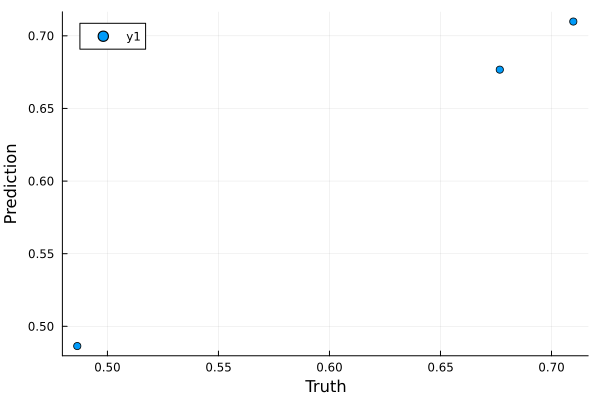

In [ ]:
using Plots

ypred = predict(mach, X)
scatter(y[1, :], ypred[1, :], xlabel="Truth", ylabel="Prediction")

## 5. Other types

SymbolicRegression.jl can handle most numeric types you wish to use.
For example, passing a `Float32` array will result in the search using
32-bit precision everywhere in the codebase:

In [ ]:
X = 2randn(Float32, 1000, 5)
y = @. 2*cos(X[:, 4]) + X[:, 1]^2 - 2

model = SRRegressor(binary_operators=[+, -, *, /], unary_operators=[cos], niterations=30)
mach = machine(model, X, y)
fit!(mach)

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter ~/.julia/packages/ProgressMeter/kVZZH/src/ProgressMeter.jl:594
Evolving for 30 iterations... 100%|██████████████████████| Time: 0:00:12


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.682e+01  0.000e+00  y = 2.4432
3           4.850e+00  1.013e+00  y = x₁ * x₁
5           1.907e+00  4.666e-01  y = (x₁ * x₁) - 1.7155
7           1.905e+00  7.681e-04  y = (x₁ * (x₁ * 1.0092)) + -1.7539
8           4.769e-01  1.385e+00  y = ((x₁ * x₁) + cos(x₄)) - 1.8578
10          0.000e+00  5.164e+01  y = ((cos(x₄) * 2) + (x₁ * x₁)) - 2
───────────────────────────────────────────────────────────────────────────────────────────────────


[ Info: Final population:


  - outputs/20250518_143952_8oazfT/hall_of_fame.csv


[ Info: Results saved to:


trained Machine; caches model-specific representations of data
  model: SRRegressor(defaults = nothing, …)
  args: 
    1:	Source @442 ⏎ AbstractMatrix{Continuous}
    2:	Source @967 ⏎ AbstractVector{Continuous}


we can see that the output types are `Float32`:

In [ ]:
r = report(mach)
best = r.equations[r.best_idx]
println(typeof(best))
# Expression{Float32,Node{Float32},...}

Expression{Float32, DynamicExpressions.NodeModule.Node{Float32}, @NamedTuple{operators::OperatorEnum{Tuple{typeof(+), typeof(-), typeof(*), typeof(/)}, Tuple{typeof(cos)}}, variable_names::Vector{String}}}


We can also use `Complex` numbers (ignore the warning
from MLJ):

In [ ]:
cos_re(x::Complex{T}) where {T} = cos(abs(x)) + 0im

X = 15 .* rand(ComplexF64, 1000, 5) .- 7.5
y = @. 2*cos_re((2+1im) * X[:, 4]) + 0.1 * X[:, 1]^2 - 2

model = SRRegressor(
    binary_operators=[+, -, *, /],
    unary_operators=[cos_re],
    maxsize=30,
    niterations=100
)
mach = machine(model, X, y)
fit!(mach)

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter ~/.julia/packages/ProgressMeter/kVZZH/src/ProgressMeter.jl:594
Evolving for 100 iterations... 100%|█████████████████████| Time: 0:04:54


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.014e+02  0.000e+00  y = -7.2542261462201605 - 0.17814217691605935im
3           2.589e+01  6.824e-01  y = x₁ / (-0.011880402595575032 - 0.8375230285579716im)
5           5.063e+00  8.160e-01  y = (x₁ * (0.10793480324105943 - 0.0002610881128461027im))...
                                       * x₁
7           1.931e+00  4.820e-01  y = ((x₁ * x₁) * (0.09968950346804276 + 1.9611337910834848...
                                      e-5im)) + (-2.000641013859287 + 0.00048038894837346347im)
9           1.929e+00  4.159e-04  y = (x₁ * ((x₁ * (0.09977311300803512 + 0.0008389219175758...
                                      374im)) + (0.014974051638602447 - 0.001451896673713091im))...
                                      ) - (2.008345332387006 + 0.06501027139850325im)
10          1.928e+00  5.932e-04  y = (((x₁ * x₁) + cos_re(x₁)) * (0.09

[ Info: Final population:
[ Info: Results saved to:


trained Machine; caches model-specific representations of data
  model: SRRegressor(defaults = nothing, …)
  args: 
    1:	Source @763 ⏎ AbstractMatrix{Unknown}
    2:	Source @691 ⏎ AbstractVector{Unknown}


## 6. Dimensional constraints

One other feature we can exploit is dimensional analysis.
Say that we know the physical units of each feature and output,
and we want to find an expression that is dimensionally consistent.

We can do this as follows, using `DynamicQuantities` to assign units.
First, let's make some data on Newton's law of gravitation:

In [ ]:
using DynamicQuantities

M = (rand(100) .+ 0.1) .* Constants.M_sun
m = 100 .* (rand(100) .+ 0.1) .* u"kg"
r = (rand(100) .+ 0.1) .* Constants.R_earth

G = Constants.G

F = @. (G * M * m / r^2)

100-element Vector{Quantity{Float64, Dimensions{FixedRational{Int32, 25200}}}}:
  5.3175185899061036e8 m kg s⁻²
   1.205178827850231e9 m kg s⁻²
   2.661639385685202e8 m kg s⁻²
  3.2760169289463675e8 m kg s⁻²
   3.190103951785975e8 m kg s⁻²
   2.583209608921833e8 m kg s⁻²
  1.0144442792774907e8 m kg s⁻²
   9.365596395624704e9 m kg s⁻²
  2.5591814006498127e9 m kg s⁻²
 1.1793482705949085e10 m kg s⁻²
   9.093559029897408e8 m kg s⁻²
  2.2981924410255438e8 m kg s⁻²
  1.4607572923702505e8 m kg s⁻²
                              ⋮
   9.546522859537482e7 m kg s⁻²
  2.5567555175202304e8 m kg s⁻²
   2.101106385037741e7 m kg s⁻²
   7.911861531664315e7 m kg s⁻²
  3.6517939772395225e9 m kg s⁻²
   5.142096945912995e8 m kg s⁻²
  1.7497894945221918e9 m kg s⁻²
   4.873925251677553e7 m kg s⁻²
   7.896623024656536e7 m kg s⁻²
   3.694491637856221e8 m kg s⁻²
   7.774437250229551e8 m kg s⁻²
   2.968890006894248e8 m kg s⁻²

(Note that the `u` macro from `DynamicQuantities` will automatically convert to SI units. To avoid this,
use the `us` macro.)

Now, let's ready the data for MLJ:

In [ ]:
X = (; M=M, m=m, r=r)
y = F

100-element Vector{Quantity{Float64, Dimensions{FixedRational{Int32, 25200}}}}:
  5.3175185899061036e8 m kg s⁻²
   1.205178827850231e9 m kg s⁻²
   2.661639385685202e8 m kg s⁻²
  3.2760169289463675e8 m kg s⁻²
   3.190103951785975e8 m kg s⁻²
   2.583209608921833e8 m kg s⁻²
  1.0144442792774907e8 m kg s⁻²
   9.365596395624704e9 m kg s⁻²
  2.5591814006498127e9 m kg s⁻²
 1.1793482705949085e10 m kg s⁻²
   9.093559029897408e8 m kg s⁻²
  2.2981924410255438e8 m kg s⁻²
  1.4607572923702505e8 m kg s⁻²
                              ⋮
   9.546522859537482e7 m kg s⁻²
  2.5567555175202304e8 m kg s⁻²
   2.101106385037741e7 m kg s⁻²
   7.911861531664315e7 m kg s⁻²
  3.6517939772395225e9 m kg s⁻²
   5.142096945912995e8 m kg s⁻²
  1.7497894945221918e9 m kg s⁻²
   4.873925251677553e7 m kg s⁻²
   7.896623024656536e7 m kg s⁻²
   3.694491637856221e8 m kg s⁻²
   7.774437250229551e8 m kg s⁻²
   2.968890006894248e8 m kg s⁻²

Since this data has such a large dynamic range, let's also create a custom loss function
that looks at the error in log-space:

In [ ]:
function loss_fnc(prediction, target)
    # Useful loss for large dynamic range
    scatter_loss = abs(log((abs(prediction)+1e-20) / (abs(target)+1e-20)))
    sign_loss = 10 * (sign(prediction) - sign(target))^2
    return scatter_loss + sign_loss
end

loss_fnc (generic function with 1 method)

Now let's define and fit our model:

In [ ]:
model = SRRegressor(
    binary_operators=[+, -, *, /],
    unary_operators=[square],
    elementwise_loss=loss_fnc,
    complexity_of_constants=2,
    maxsize=25,
    niterations=100,
    populations=50,
    dimensional_constraint_penalty=10^5,
)
mach = machine(model, X, y)
fit!(mach)

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter ~/.julia/packages/ProgressMeter/kVZZH/src/ProgressMeter.jl:594
Evolving for 100 iterations... 100%|█████████████████████| Time: 0:00:27


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.000e+05  0.000e+00  y[m s⁻² kg] = r[m]
2           1.240e+00  1.130e+01  y[m s⁻² kg] = 2.5946e+08[?]
4           8.852e-01  1.686e-01  y[m s⁻² kg] = 9.4485e+14[?] / r[m]
6           7.532e-01  8.077e-02  y[m s⁻² kg] = m[kg] * (2.162e+13[?] / r[m])
7           5.361e-01  3.399e-01  y[m s⁻² kg] = M[kg] / square(r[m] * 17650[?])
9           2.326e-11  1.193e+01  y[m s⁻² kg] = M[kg] * (m[kg] / (square(r[m]) * 1...
                                                .4983e+10[?]))
10          2.326e-11  1.909e-07  y[m s⁻² kg] = M[kg] * (m[kg] / ((r[m] * 1.4983e+...
                                                10[?]) * r[m]))
12          5.906e-16  5.291e+00  y[m s⁻² kg] = (0.75677[?] * m[kg]) * (M[kg] / (s...
                                                quare(r[m]) * 1.1339e+10[?]))
15          2.509e-16  2.854e-01  y[m s⁻² kg] = ((M[

[ Info: Final population:
[ Info: Results saved to:


trained Machine; caches model-specific representations of data
  model: SRRegressor(defaults = nothing, …)
  args: 
    1:	Source @721 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @239 ⏎ AbstractVector{Continuous}


You can observe that all expressions with a loss under
our penalty are dimensionally consistent! (The `"[?]"` indicates free units in a constant,
which can cancel out other units in the expression.) For example,

```julia
"y[m s⁻² kg] = (M[kg] * 2.6353e-22[?])"
```

would indicate that the expression is dimensionally consistent, with
a constant `"2.6353e-22[m s⁻²]"`.

Note that you can also search for dimensionless units by settings
`dimensionless_constants_only` to `true`.

## 7. Working with Expressions

Expressions in `SymbolicRegression.jl` are represented using the `Expression{T,Node{T},...}` type, which provides a more robust way to combine structure, operators, and constraints. Here's an example:

In [ ]:
# Define options with operators and structure
options = Options(
    binary_operators=[+, -, *],
    unary_operators=[cos],
)

operators = options.operators
variable_names = ["x1", "x2"]
x1 = Expression(
    SymbolicRegression.Node{Float64}(feature=1),
    operators=operators,
    variable_names=variable_names,
)
x2 = Expression(
    SymbolicRegression.Node{Float64}(feature=2),
    operators=operators,
    variable_names=variable_names,
)

# Construct and evaluate expression
expr = x1 * cos(x2 - 3.2)
X = rand(Float64, 2, 100)
output = expr(X)

100-element Vector{Float64}:
 -0.6161642394876403
 -0.43241298837106973
 -0.09448743541077943
 -0.21479507343661142
 -0.5016525044064871
 -0.12462218676487535
 -0.6719166113968367
 -0.8752545358779276
 -0.7858981124419301
 -0.14813386279263607
 -0.7491909494405311
 -0.8803617115890107
 -0.20665690463023714
  ⋮
 -0.929270925088885
 -0.3378695323537974
 -0.7901056530387904
 -0.04836258622982129
 -0.7271943450247906
 -0.168787343042048
 -0.14660996971378928
 -0.25011793887178224
 -0.5785865754251074
 -0.0450083247559207
 -0.6419985764106746
 -0.8099348677112302

This `Expression` type, contains the operators used in the expression.
These are what are returned by the search. The raw `Node` type (which is
what used to be output directly) is accessible with

In [ ]:
get_contents(expr)

x1 * cos(x2 - 3.2)

## 8. Template Expressions

Template expressions allow you to define structured expressions where different parts can be constrained to use specific variables.
In this example, we'll create expressions that constrain the functional form in highly specific ways.

First, let's set up our basic configuration:

In [ ]:
using SymbolicRegression
using Random: rand, MersenneTwister
using MLJBase: machine, fit!, report

The key part is defining our template structure. This determines how different parts of the expression combine:

In [ ]:
expression_spec = @template_spec(expressions=(f, g)) do x1, x2, x3
    f(x1, x2) + g(x2) - g(x3)
end

TemplateExpressionSpec{TemplateStructure{(:f, :g), (), var"#3#4", @NamedTuple{f::Int64, g::Int64}, @NamedTuple{}}}(TemplateStructure{(:f, :g), (), var"#3#4", @NamedTuple{f::Int64, g::Int64}, @NamedTuple{}}(var"#3#4"(), (f = 2, g = 1), NamedTuple()))

With this structure, we are telling the algorithm that it can learn
any symbolic expressions `f` and `g`, with `f` a function of two inputs,
and `g` a function of one input. The result of

```math
f(x_1, x_2) + g(x_2) - g(x_3)
```

will be compared with the target `y`.

Let's generate some example data:

In [ ]:
n = 100
rng = MersenneTwister(0)
x1 = 10rand(rng, n)
x2 = 10rand(rng, n)
x3 = 10rand(rng, n)
X = (; x1, x2, x3)
y = [
    2 * cos(x1[i] + 3.2) + x2[i]^2 - 0.8 * x3[i]^2
    for i in eachindex(x1)
]

100-element Vector{Float64}:
 -26.47367644977267
 -14.715342333283537
  38.32081388079775
  49.705252202592575
   3.329275025968748
  56.6146051430872
  -1.800365525914021
  92.37709822947161
 -52.20480001721743
  -0.3804708565836721
   2.8888116441166503
  80.92421046921555
  11.505705621924967
   ⋮
  61.88842718276606
 -18.87612604339361
 -64.23307898781431
 -47.993691468241465
 -42.33504296019273
   5.333279767116792
  69.5592565469868
  -2.6282487413333993
  58.748274742536026
  29.05539582863657
 -43.76444009013103
  24.23533839011353

Now, remember our structure: for the model to learn this,
it would need to correctly disentangle the contribution
of `f` and `g`!

Now we can set up and train our model by passing the structure in to `expression_spec`:


In [ ]:
model = SRRegressor(;
    binary_operators=(+, -, *, /),
    unary_operators=(cos,),
    niterations=500,
    maxsize=25,
    expression_spec=expression_spec,
)

mach = machine(model, X, y)
fit!(mach)

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter ~/.julia/packages/ProgressMeter/kVZZH/src/ProgressMeter.jl:594
Evolving for 500 iterations... 100%|█████████████████████| Time: 0:02:43


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
2           1.075e+03  0.000e+00  ╭ f = #2
                                  ╰ g = #1
4           3.200e+01  1.757e+00  ╭ f = 6.0485
                                  ╰ g = #1 * #1
6           8.723e+00  6.498e-01  ╭ f = #2
                                  ╰ g = (#1 + -1.4563) * #1
8           4.642e+00  3.155e-01  ╭ f = #2 * 1.4214
                                  ╰ g = (#1 * #1) * 0.83589
10          2.045e+00  4.098e-01  ╭ f = #2 * (#2 * 0.2014)
                                  ╰ g = (#1 * #1) * 0.79471
12          2.043e+00  4.835e-04  ╭ f = ((#2 * #2) * 0.19954) - -0.081835
                                  ╰ g = (#1 * #1) * 0.79576
13          5.086e-01  1.391e+00  ╭ f = ((#2 * #2) * 0.20107) - cos(#1)
                                  ╰ g = (#1 * #1) * 0.79711
15          5.669e-03  2.248e+00  ╭ f = ((#2 * 0.20074) * #2) - (cos(#1) / 0

[ Info: Final population:


  - outputs/20250518_150752_JZoD1s/hall_of_fame.csv


[ Info: Results saved to:


trained Machine; caches model-specific representations of data
  model: SRRegressor(defaults = nothing, …)
  args: 
    1:	Source @508 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @282 ⏎ AbstractVector{Continuous}


If all goes well, you should see a printout with the following expression:

```text
y = ╭ f = ((#2 * 0.2) * #2) + (cos(#1 + 0.058407) * -2)
    ╰ g = #1 * (#1 * 0.8)
```

This is what we were looking for! We can see that under
$f(x_1, x_2) + g(x_2) - g(x_3)$, this correctly expands to
$2 \cos(x_1 + 3.2) + x_2^2 - 0.8 x_3^2$.

We can also access the individual parts of the template expression
directly from the report:

In [ ]:
r = report(mach)
best_expr = r.equations[r.best_idx]

# Access individual parts of the template expression
println("f: ", get_contents(best_expr).f)
println("g: ", get_contents(best_expr).g)

f: (x2 * (x2 * 0.20000000000000195)) - (cos(-0.058407346409884736 - x1) + cos(-0.058407346409884736 - x1))
g: (x1 * x1) * 0.8000000000000052


The `TemplateExpression` combines these under the structure
so we can directly and efficiently evaluate this:

In [ ]:
best_expr(randn(3, 20))

20-element Vector{Float64}:
 -3.724936723629149
  0.354440170499309
 -4.954127615850829
 -3.751727956651134
 -0.541899143978567
 -1.9160462439628585
 -3.863663974597091
 -1.335115000807696
 -1.95559587668004
 -0.5767310006542484
 -1.1527917119261097
 -1.2051412065839975
 -1.4815310610520869
  3.316046203151698
 -1.3716451713799422
 -2.99787656881281
 -2.8472387427666135
 -1.5852561390696298
 -0.3637694805943765
 -2.005885519641742

The above code demonstrates how template expressions can be used to:

- Define structured expressions with multiple components
- Constrains which variables can be used in each component
- Create expressions that can output multiple values

## 9. Logging with TensorBoard

You can track the progress of symbolic regression searches using TensorBoard or other logging backends. Here's an example using `TensorBoardLogger` and wrapping it with `SRLogger`:

In [ ]:
using SymbolicRegression
using TensorBoardLogger
using MLJ

logger = SRLogger(TBLogger("logs/sr_run"))

# Create and fit model with logger
model = SRRegressor(
    binary_operators=[+, -, *],
    maxsize=40,
    niterations=100,
    logger=logger
)

X = (a=rand(500), b=rand(500))
y = @. 2 * cos(X.a * 23.5) - X.b^2

mach = machine(model, X, y)
fit!(mach)

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter ~/.julia/packages/ProgressMeter/kVZZH/src/ProgressMeter.jl:594
Evolving for 100 iterations... 100%|█████████████████████| Time: 0:00:31


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.976e+00  0.000e+00  y = -0.3804
3           1.903e+00  1.885e-02  y = 0.10716 - b
5           1.882e+00  5.455e-03  y = (-0.32616 - a) * b
7           1.867e+00  3.954e-03  y = b * ((0.40763 - b) - a)
9           1.862e+00  1.481e-03  y = (a * (0.52867 - a)) - (b * b)
11          1.852e+00  2.806e-03  y = (a * ((0.48729 - a) * a)) - (b * b)
13          1.804e+00  1.301e-02  y = a * ((((a + -0.49836) * -12.689) * (a - 0.82402)) - b)
15          1.776e+00  7.909e-03  y = ((a + -0.85198) * ((a - 0.40471) * ((a * -17.11) - -2....
                                      9353))) - b
17          1.761e+00  4.017e-03  y = ((a + -0.49099) * ((a + -0.81508) * ((a * -17.217) + 2...
                                      .0988))) - (b * b)
19          1.758e+00  1.082e-03  y = ((a + -0.5326) * (((a * -17.16) + 1.7808) * (a + -0.79...
            

[ Info: Final population:
[ Info: Results saved to:


trained Machine; caches model-specific representations of data
  model: SRRegressor(defaults = nothing, …)
  args: 
    1:	Source @404 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @630 ⏎ AbstractVector{Continuous}


You can then view the logs with:

```bash
tensorboard --logdir logs
```

The TensorBoard interface will show
the loss curves over time (at each complexity), as well
as the Pareto frontier volume which can be used as an overall metric
of the search performance.

## 10. Using Differential Operators

`SymbolicRegression.jl` supports differential operators via [`DynamicDiff.jl`](https://github.com/MilesCranmer/DynamicDiff.jl), allowing you to include derivatives directly within template expressions.
Here is an example where we discover the integral of $\frac{1}{x^2 \sqrt{x^2 - 1}}$ in the range $x > 1$.

First, let's generate some data for the integrand:

In [ ]:
using SymbolicRegression
using Random

rng = MersenneTwister(42)
x = 1 .+ rand(rng, 1000) * 9  # Sampling points in the range [1, 10]
y = @. 1 / (x^2 * sqrt(x^2 - 1))  # Values of the integrand

1000-element Vector{Float64}:
 0.0024932452295086086
 0.32718375951571443
 0.0068375181838845125
 0.061683468334829725
 0.4166199896991666
 0.020037596672091495
 0.008026503912570598
 0.09226029852205042
 0.04471019172337416
 0.007402986679831381
 0.05172893588280133
 0.0017876895437482542
 0.012185138696873708
 ⋮
 0.0023251345856583113
 0.04562457660792244
 0.10064109603436774
 0.015461684425810307
 0.003936524891660818
 0.3683286109886386
 0.005802036033732874
 0.00616173954300673
 0.0011250574191018635
 0.24755937926082153
 0.03940220847742538
 0.06317983650336356

Now, define the template for the derivative operator:

In [ ]:
using SymbolicRegression: D

expression_spec = @template_spec(expressions=(f,)) do x
    D(f, 1)(x)
end

TemplateExpressionSpec{TemplateStructure{(:f,), (), var"#7#8", @NamedTuple{f::Int64}, @NamedTuple{}}}(TemplateStructure{(:f,), (), var"#7#8", @NamedTuple{f::Int64}, @NamedTuple{}}(var"#7#8"(), (f = 1,), NamedTuple()))

We can now set up the model to find the symbolic expression for the integral:

In [ ]:
using MLJ

model = SRRegressor(
    binary_operators=(+, -, *, /),
    unary_operators=(sqrt,),
    maxsize=20,
    expression_spec=expression_spec,
)

X = (; x=x)
mach = machine(model, X, y)
fit!(mach)

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter ~/.julia/packages/ProgressMeter/kVZZH/src/ProgressMeter.jl:594
Evolving for 100 iterations... 100%|█████████████████████| Time: 0:01:38


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.899e-01  0.000e+00  f = 1.499
2           1.635e-01  1.498e-01  f = sqrt(#1)
3           6.601e-02  9.070e-01  f = -1.841 / #1
4           6.056e-02  8.620e-02  f = sqrt(#1 - 1.0095)
5           1.948e-03  3.437e+00  f = 0.12919 / (0.84687 - #1)
6           1.246e-03  4.468e-01  f = sqrt(1.4402 - (1.4483 / #1))
7           2.127e-04  1.768e+00  f = sqrt(sqrt(6.694 - (6.5908 / #1)))
8           9.714e-23  4.223e+01  f = sqrt(1 - ((1 / #1) / #1))
10          1.008e-32  1.149e+01  f = sqrt((#1 - (#1 / (#1 * #1))) / #1)
12          3.058e-33  5.966e-01  f = sqrt(((#1 * #1) - (#1 / #1)) / (#1 * #1))
18          3.048e-33  5.412e-04  f = (0.14381 / (#1 / #1)) + sqrt(((#1 * #1) - (#1 / #1)) / (#1...
                                   * #1))
19          3.047e-33  2.185e-04  f = sqrt(0.068941 / (#1 / #1)) + sqrt(((#1 * #1) - (#1 / #1)) ...

[ Info: Final population:
[ Info: Results saved to:


trained Machine; caches model-specific representations of data
  model: SRRegressor(defaults = nothing, …)
  args: 
    1:	Source @049 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @747 ⏎ AbstractVector{Continuous}


The learned expression will represent $f(x)$, the indefinite integral of the given function. The derivative of $f(x)$ should match the target $\frac{1}{x^2 \sqrt{x^2 - 1}}$.

You can access the best expression from the report:

In [ ]:
r = report(mach)
best_expr = r.equations[r.best_idx]

println("Learned expression: ", best_expr)

Learned expression: f = sqrt(((#1 * #1) - (#1 / #1)) / (#1 * #1))


If successful, the result should simplify to something like $\frac{\sqrt{x^2 - 1}}{x}$, which is the integral of the target function.